In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator


# Initialize the CNN
classifier = Sequential()

# Step 1: Convolution
classifier.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2: Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))  # pool size 2x2

# Deep-2
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))  # pool size 2x2

# Adding dropout to prevent overfitting
classifier.add(Dropout(0.25))

# Step 3: Convolutional layer
classifier.add(Conv2D(16, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))  # pool size 2x2

# Step 4: Flattening
classifier.add(Flatten())

# Step 5: Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))  # Adding dropout
classifier.add(Dense(units=1, activation='sigmoid'))


In [3]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:

# Prepare test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Training dataset directory
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive/gender/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Testing dataset directory
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive/gender/test',
                                             target_size=(64, 64),
                                             batch_size=32,
                                             class_mode='binary')


Found 3491 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
# Fit the dataset to the classifier
history = classifier.fit_generator(training_set,
                                   steps_per_epoch=len(training_set),
                                   epochs=25,
                                   validation_data=test_set,
                                   validation_steps=len(test_set))

<ipython-input-6-f2d7a1b81787>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


Epoch 1/25
110/110 [==============================] - 2344s 21s/step - loss: 0.6763 - accuracy: 0.5686 - val_loss: 0.5445 - val_accuracy: 0.7600
Epoch 2/25
110/110 [==============================] - 18s 160ms/step - loss: 0.5561 - accuracy: 0.7158 - val_loss: 0.3820 - val_accuracy: 0.8400
Epoch 3/25
110/110 [==============================] - 19s 169ms/step - loss: 0.4349 - accuracy: 0.8152 - val_loss: 0.3194 - val_accuracy: 0.8850
Epoch 4/25
110/110 [==============================] - 18s 163ms/step - loss: 0.3549 - accuracy: 0.8490 - val_loss: 0.2140 - val_accuracy: 0.9300
Epoch 5/25
110/110 [==============================] - 18s 160ms/step - loss: 0.3238 - accuracy: 0.8654 - val_loss: 0.1891 - val_accuracy: 0.9450
Epoch 6/25
110/110 [==============================] - 19s 169ms/step - loss: 0.3309 - accuracy: 0.8654 - val_loss: 0.2157 - val_accuracy: 0.9000
Epoch 7/25
110/110 [==============================] - 18s 162ms/step - loss: 0.2832 - accuracy: 0.8857 - val_loss: 0.2140 - val_ac

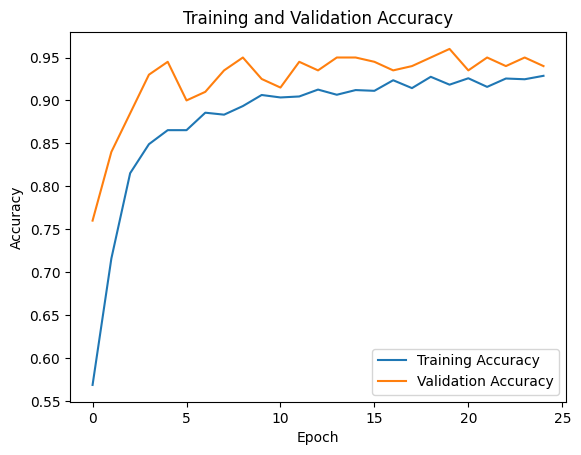

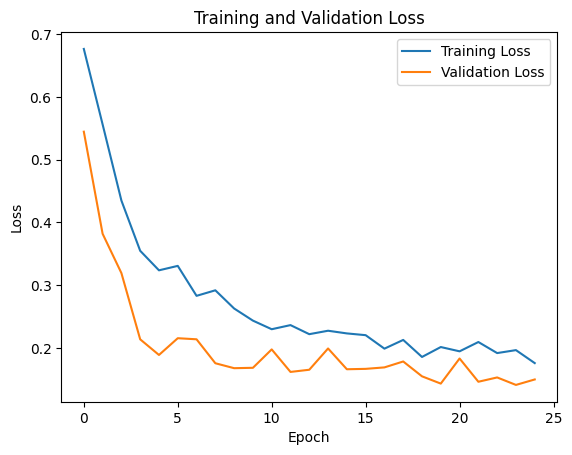

In [7]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




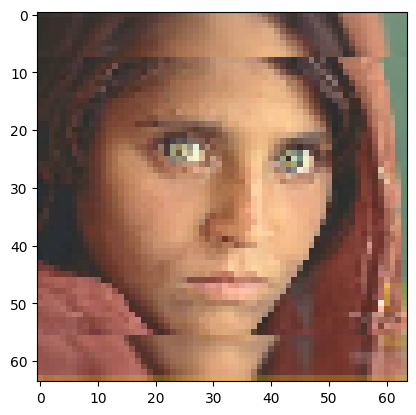

1/1 [==============================] - 0s 18ms/step
Female


In [16]:
from keras.preprocessing import image

# Path to the image you want to predict
image_path = "/WhatsApp Image 2024-03-06 at 16.39.46.jpeg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(64, 64))
plt.imshow(img)
plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
images = np.vstack([X])

# Predict the gender
prediction = classifier.predict(images)

# Output the result
if prediction < 0.5:
    print("Female")
else:
    print("Male")


In [ ]:
# Predict gender for images
dir_path = "/content/drive/MyDrive/archive/gender/test/female"

for i in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, i), target_size=(64,64))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = classifier.predict(images)
    if val == 0:
        print("Female")
    else:
        print("Male")

In [12]:
import requests
from PIL import Image
from io import BytesIO
from keras.preprocessing import image
import numpy as np

# Function to load and preprocess image from URL
def load_and_preprocess_image_from_url(image_url, target_size=(64, 64)):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    return X

# URL of the image you want to predict
image_url = "https://images.unsplash.com/photo-1529626455594-4ff0802cfb7e?q=80&w=3000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

# Load and preprocess the image from URL
X = load_and_preprocess_image_from_url(image_url)

# Predict the gender
prediction = classifier.predict(X)

# Output the result
if prediction < 0.5:
    print("Female")
else:
    print("Male")


1/1 [==============================] - 0s 31ms/step
Male
